# Analysis of MNIST Fashion Dataset

Importing the essential libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MNIST Fashion Dataset Labels

0 - T-shirt
1 - Trouser
2 - Pullover
3 - Dress
4 - Coat
5 - Sandal
6 - Shirt
7 - Sport Shoes
8 - Bag
9 - Ankel Boot

Extracting the Dataset

In [3]:
from keras import datasets, layers, models
(train_images, train_labels), (test_images, test_lables) = datasets.fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
np.unique(train_labels, return_counts=False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
     

In [15]:
train_images[0].shape

(28, 28)

Visualising an image from the training set

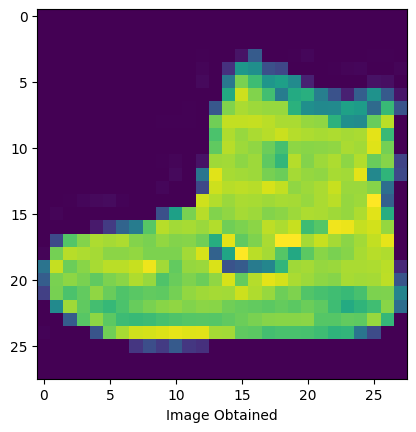

In [16]:
plt.imshow(train_images[0])
plt.xlabel("Image Obtained")
plt.show()

Preprocessing of Dataset

In [17]:
train_images = train_images/255
test_images = test_images/255

Building the Neural Networks

In [22]:
layers = []
layers.append(tf.keras.layers.Flatten(input_shape = (28,28)))
layers.append(tf.keras.layers.Dense(64, activation='relu'))
layers.append(tf.keras.layers.Dense(32, activation='relu'))
layers.append(tf.keras.layers.Dense(16, activation='relu'))
layers.append(tf.keras.layers.Dense(10))

model = tf.keras.Sequential(layers)
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 2s 2ms/step - loss: 0.6063 - accuracy: 0.7926 - val_loss: 0.4396 - val_accuracy: 0.8475
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4155 - accuracy: 0.8529 - val_loss: 0.3831 - val_accuracy: 0.8612
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3711 - accuracy: 0.8673 - val_loss: 0.3708 - val_accuracy: 0.8643
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3438 - accuracy: 0.8761 - val_loss: 0.3745 - val_accuracy: 0.8635
Epoch 5/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3265 - accuracy: 0.8804 - val_loss: 0.3702 - val_accuracy: 0.8667
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.3110 - accuracy: 0.8865 - val_loss: 0.3343 - val_accuracy: 0.8792
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2973 - accuracy: 0.8914 - val_loss: 0.3350 - val_accuracy: 0.8803
Epoch 

In [25]:
prob_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [29]:
preds = prob_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


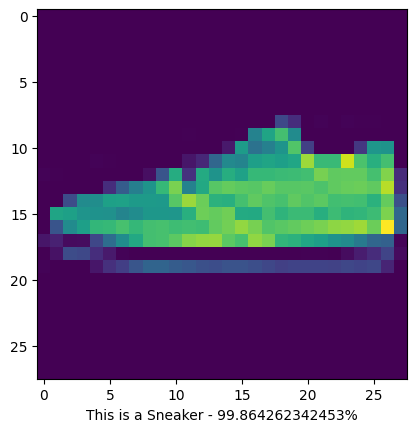

In [59]:
identity = 60
right = np.argmax(preds[identity])
plt.imshow(test_images[identity])
plt.xlabel("This is a {} - {}%".format(class_names[right], np.max(preds[identity])*100))
plt.show()